## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [41]:
import pandas
import matplotlib.pyplot as plot

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [5]:
df = pandas.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [18]:
df.head()
df.tail()

,DATE,TAG,POSTS
2770,2025-03-01 00:00:00,php,376
2771,2025-03-01 00:00:00,python,2404
2772,2025-03-01 00:00:00,r,501
2773,2025-03-01 00:00:00,ruby,47
2774,2025-03-01 00:00:00,swift,310


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [8]:
df.shape

(2775, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [59]:
df.count()

DATE     2775
TAG      2775
POSTS    2775
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [51]:
df[['TAG', 'POSTS']].groupby(['TAG']).sum().sort_values(['POSTS'], ascending=False).head(1)

,POSTS
TAG,
javascript,2531047


In [61]:
df_summed_tag = df[['TAG', 'POSTS']].groupby(['TAG']).sum()
df_summed_tag.loc[[df_summed_tag['POSTS'].idxmax()]]

,POSTS
TAG,
javascript,2531047


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [101]:
df.groupby(['TAG']).count()

,DATE,POSTS
TAG,,
assembly,200,200
c,200,200
c#,201,201
c++,200,200
delphi,200,200
go,185,185
java,200,200
javascript,200,200
perl,200,200


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [108]:
pandas.DataFrame(pandas.to_datetime(df.DATE)).head()

,DATE
0,2008-07-01
1,2008-08-01
2,2008-08-01
3,2008-08-01
4,2008-08-01


In [6]:
df['DATE'] = pandas.to_datetime(df['DATE'])

In [107]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [27]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [28]:
reshaped_df.shape

(201, 14)

In [29]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [31]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1639.0,753.0,104.0,NaN,1122.0,630.0,129.0,473.0,534.0,6.0,285.0,NaN
2008-10-01,16.0,303.0,1984.0,805.0,112.0,NaN,1145.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,953.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [32]:
reshaped_df.count()

TAG
assembly      200
c             200
c#            201
c++           200
delphi        200
go            185
java          200
javascript    200
perl          200
php           200
python        200
r             198
ruby          200
swift         191
dtype: int64

In [34]:
reshaped_df.fillna(0, inplace=True)

In [36]:
reshaped_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

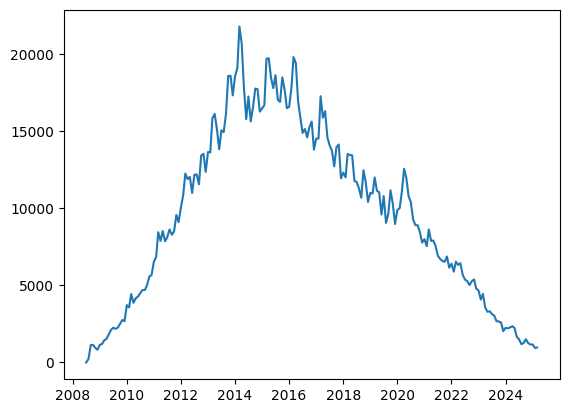

In [58]:
plot.plot(reshaped_df.java)

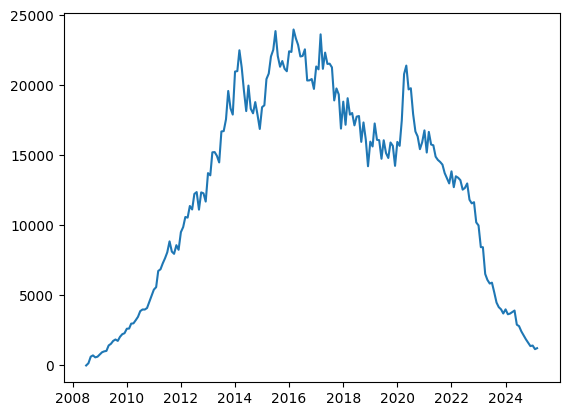

In [65]:
plot.plot(reshaped_df.javascript)

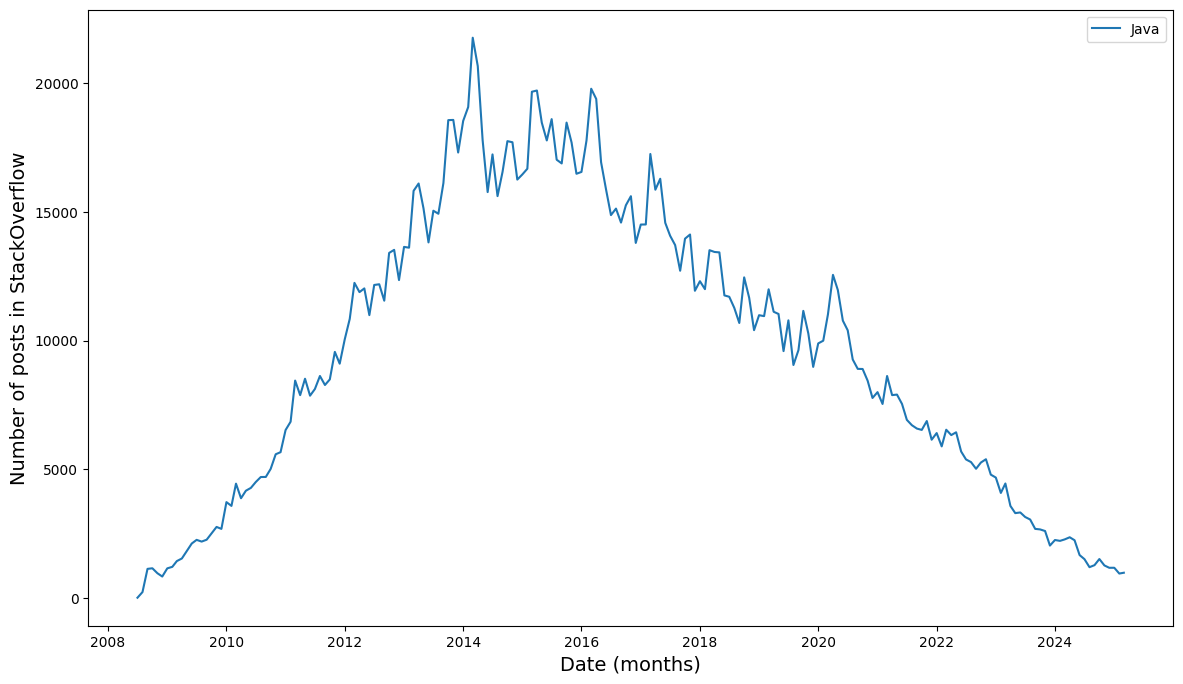

In [86]:
plot.figure(figsize=(14,8))
plot.plot(reshaped_df.java, label='Java')
plot.ylabel("Number of posts in StackOverflow", fontsize=14)
plot.xlabel("Date (months)", fontsize=14)
plot.legend()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

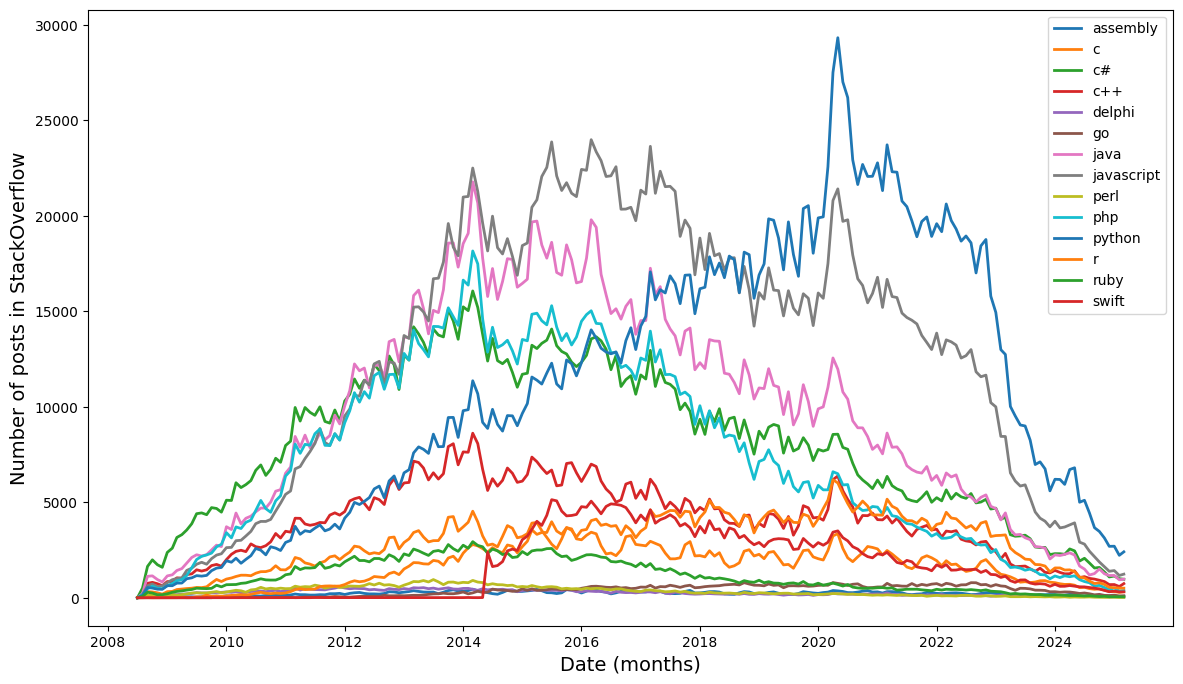

In [96]:
plot.figure(figsize=(14,8))
plot.ylabel("Number of posts in StackOverflow", fontsize=14)
plot.xlabel("Date (months)", fontsize=14)

for column in reshaped_df.columns:
    plot.plot(reshaped_df[column], linewidth=2, label=column)

plot.legend()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

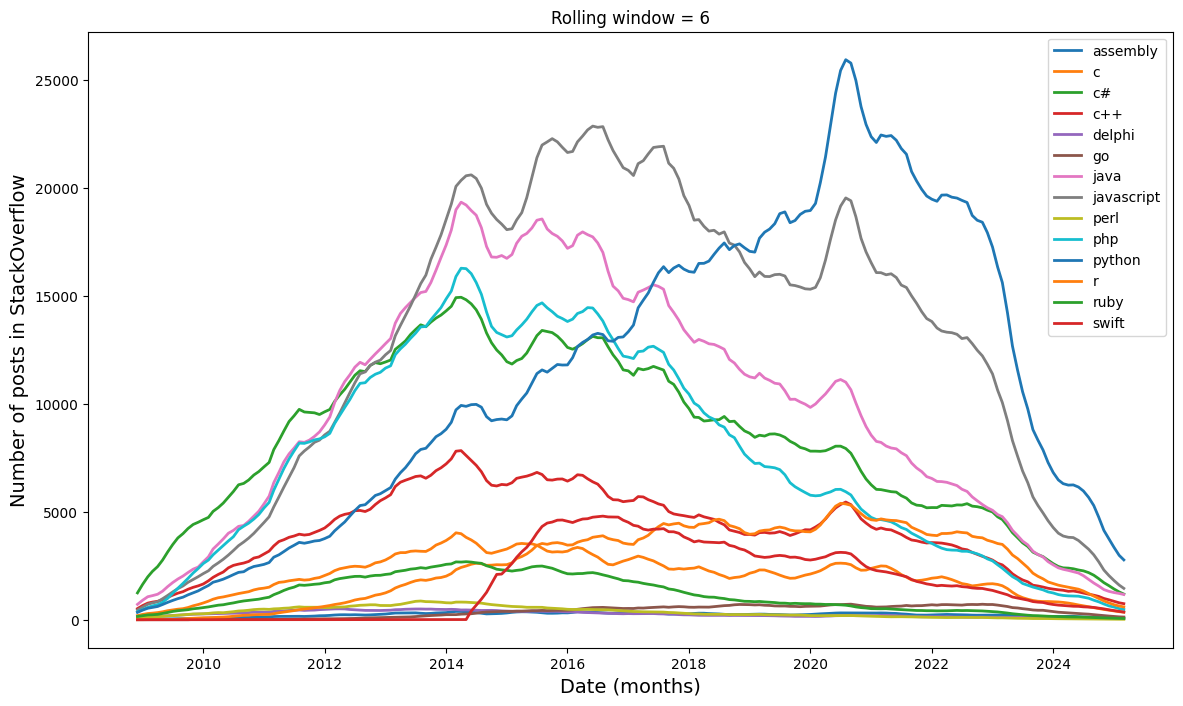

In [103]:
ROLLING_WINDOW=6
roll_df = reshaped_df.rolling(window=ROLLING_WINDOW).mean()

plot.figure(figsize=(14,8))
plot.ylabel("Number of posts in StackOverflow", fontsize=14)
plot.xlabel("Date (months)", fontsize=14)
plot.title(f"Rolling window = {ROLLING_WINDOW}")

for column in roll_df.columns:
    plot.plot(roll_df[column], linewidth=2, label=column)

plot.legend()

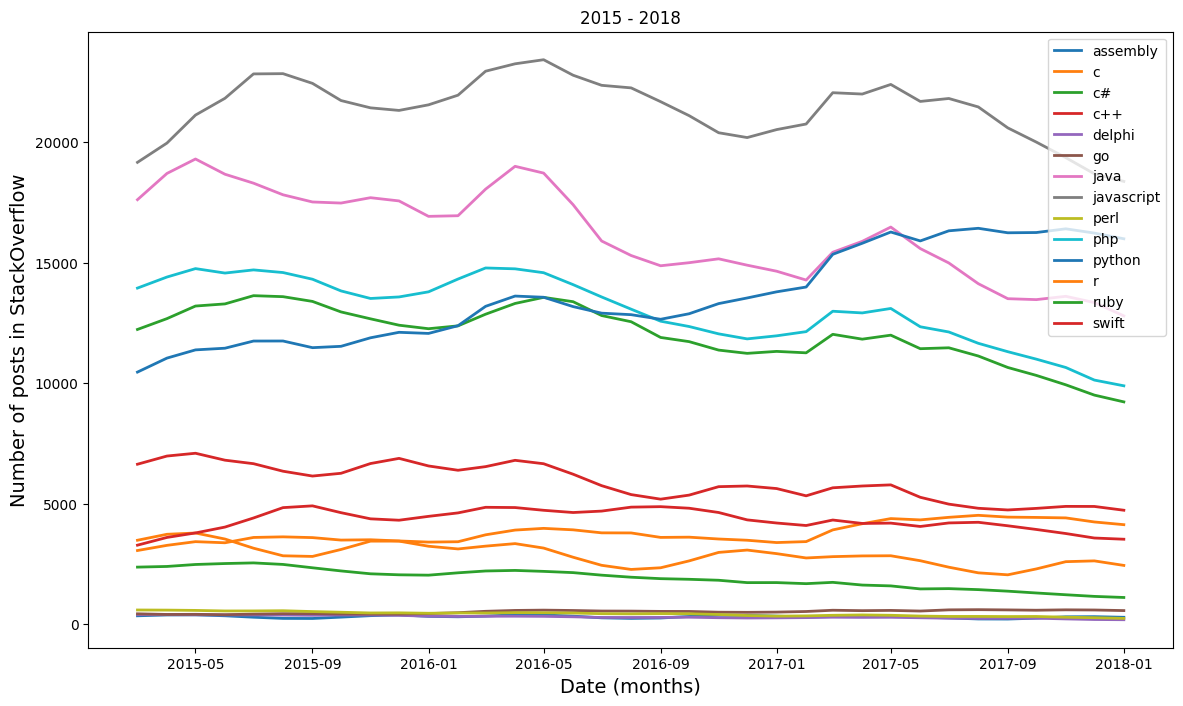

In [112]:
ROLLING_WINDOW=3
time_slice = reshaped_df.loc['2015-01-01':'2018-01-01']
roll_df = time_slice.rolling(window=ROLLING_WINDOW).mean()


plot.figure(figsize=(14,8))
plot.ylabel("Number of posts in StackOverflow", fontsize=14)
plot.xlabel("Date (months)", fontsize=14)
plot.title("2015 - 2018")

for column in roll_df.columns:
    plot.plot(roll_df[column], linewidth=2, label=column)

plot.legend()

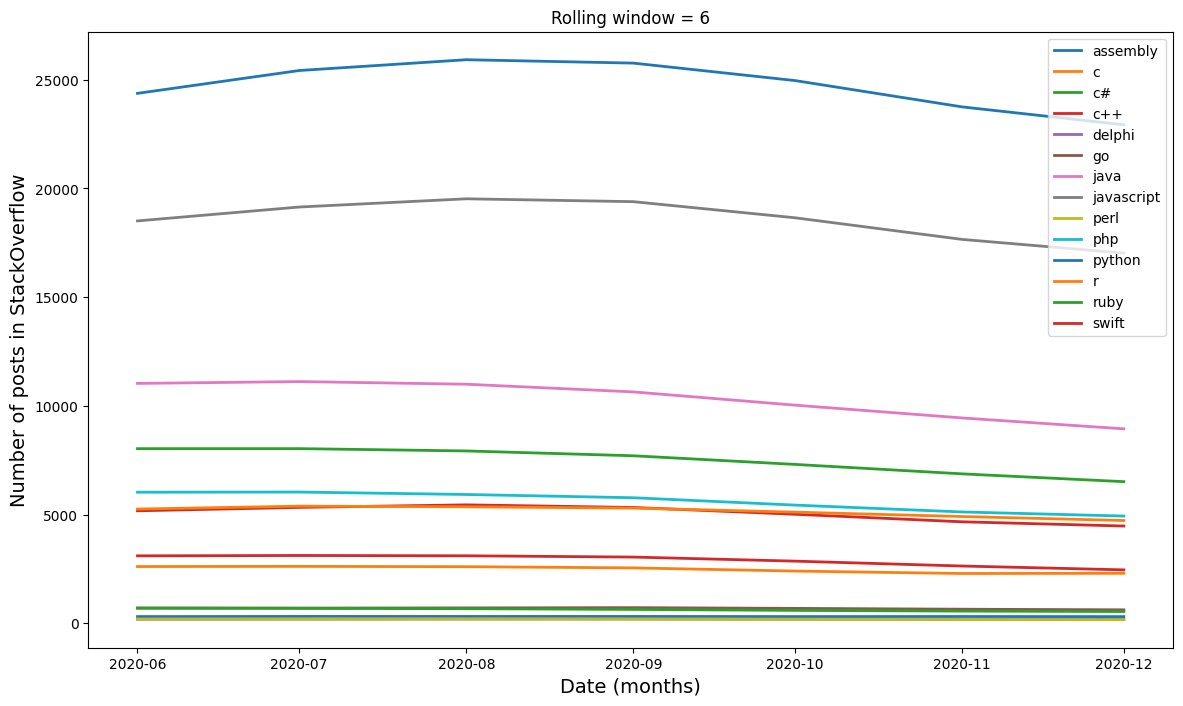

In [114]:
ROLLING_WINDOW=6
time_slice = reshaped_df.loc['2020-01-01':'2020-12-31']
roll_df = time_slice.rolling(window=ROLLING_WINDOW).mean()


plot.figure(figsize=(14,8))
plot.ylabel("Number of posts in StackOverflow", fontsize=14)
plot.xlabel("Date (months)", fontsize=14)
plot.title(f"Rolling window = {ROLLING_WINDOW}")

for column in roll_df.columns:
    plot.plot(roll_df[column], linewidth=2, label=column)

plot.legend()